Task 1
1.

$$ \textbf{Derivation of logistic regression function using MLE}$$

Answer:

$$ℓ(θ) = ∑_i [y_i\log p_i + (1-y_i)\log(1-p_i)] \tag{1}$$


Derived from the likelihood function:

$$\mathscr{L}(\theta) = ∏_i p_i^{y_i}(1-p_i)^{1-y_i} = (p_0^{y_0}(1-p_0)^{1-y_0}) \cdot (p_1^{y_1}(1-p_1)^{1-y_1}) \cdot (p_2^{y_2}(1-p_2)^{1-y_2}) \cdot ... \cdot (p_i^{y_i}(1-p_i)^{1-y_i}) \tag{2}$$

Eq.1 comes from the log of Eq.2.


$$\Rightarrow \log \mathscr{L}(\theta) = ℓ(\theta) \tag{3}$$

$$ ⇒ \log \mathscr{L}(\theta) = \log [(p_0^{y_0}(1-p_0)^{1-y_0}) \cdot (p_1^{y_1}(1-p_1)^{1-y_1}) \cdot (p_2^{y_2}(1-p_2)^{1-y_2}) \cdot ... \cdot (p_i^{y_i}(1-p_i)^{1-y_i})]$$

Consider $p_i^{y_i}(1-p_i)^{1-y_i} = a_i$.

$$\log \mathscr{L}(\theta) = \log (a_0 a_1 a_2 ... a_i) \tag{4}$$

$$\Rightarrow \log \mathscr{L}(\theta) = \sum_i \log a_i \tag{5}$$

Consider only $\log a_i$,

$$\log a_i = \log [p_i^{y_i}(1-p_i)^{1-y_i}] = \log p_i^{y_i} + \log (1-p_i)^{1-y_i}  \tag{6}$$


Using $\log a^b = b\log a$,

$$\Rightarrow \log p_i^{y_i} + \log (1-p_i)^{1-y_i} = y_i\log p_i + (1-y_i)\log (1-p_i) \tag{7}$$

Plugging in Eq.7 into Eq.5,

$$\ell (\theta) = \log \mathscr{L}(\theta) = \sum_i y_i\log p_i + (1-y_i)\log (1-p_i) \tag{8}$$

$$\textbf{MAP technique for logistic regression }$$

The MAP technique estimates distribution and model parameters that best explain an observed dataset. It solves the density estimation and calculates conditional probability by observing the data given a model weighted by a prior probability.

MAP estimation is similar to MLE with the addition of prior knowledge about the parameters $Θ$. MLE estimates the parameters using only the observed data. MAP combines the observed data with prior beliefs about $Θ$, which is useful when the data is limited or noisy. In the LEGO dataset I chose, if prior knowledge suggested that older sets with few pieces are more likely to retire, MAP could weight the parameters according to that information, whereas MLE would rely only on observed retirement patterns. In this dataset, features like year and pieces could serve as inputs and prior knowledge about trends in retired sets could be incorporated using MAP.

Citation: https://machinelearningmastery.com/maximum-a-posteriori-estimation/

2.
A machine learning problem I wish to solve using logistic regression with the selected LEGO dataset is identifying which LEGO sets are most popular, so that similar sets can be produced more frequently in the future. The target variable would be $y_i$, where $y_i=1$ represents a popular LEGO set and $y_i=0$ represents a less popular set. Popularity can be defined using measurable indicators such as higher retail price retention, higher number of releases within a theme, or other dataset-driven thresholds. The features used for this task would include year, pieces, minifigs, theme, and US retail price. Newer sets may reflect current consumer trends, larger sets with more pieces often attract advanced builders, sets with more minifigures may be more appealing for play value, certain themes (such as Star Wars or City) consistently perform well, and price can act as a proxy for perceived value and demand.

Logistic regression is appropriate for this task because it produces a probability estimate that a given LEGO set belongs to the “popular” class, allowing LEGO to rank sets by popularity likelihood rather than making only a hard classification. Additionally, logistic regression provides interpretable coefficients, making it possible to understand how each feature contributes to popularity. For example, a positive coefficient for minifigs would indicate that sets with more minifigures are more likely to be popular, which is valuable for decision-making in product design and marketing.

When compared to another linear classification model such as a Support Vector Machine (SVM), logistic regression is better suited for this problem. Logistic regression outputs calibrated probabilities, which are useful for ranking and prioritization, while SVM primarily outputs class labels or margins. Additionally, logistic regression coefficients are easier to interpret directly, whereas SVM models often require kernel selection and additional tuning that can reduce transparency. Since interpretability is important for understanding consumer preferences, logistic regression provides a clearer and more actionable solution.

Citation of linear SVM: https://www.geeksforgeeks.org/machine-learning/support-vector-machine-algorithm/

3.
In general

In the log likelihood function $ℓ(Θ)$, each $y_i$ represents the binary label for the ith data point. $p_i$ represents the model’s probability of the class which is computed from the feature vector $x_i$. $y_i$ is the target column, $p_i$ is the model output, $x_i$ is row $i$.

According to the LEGO dataset

The target variable $y_i$ would represent whether the LEGO set $i$ is popular (1) or otherwise (0). The feature vector $x_i$ would include the numeric features from the dataset like pieces, minifigs, US_retailPrice, and year. It would also include categorical features like theme and subtheme, which could be one-hot encoded to convert them into numeric formats. Each LEGO set is assumed independent of the others, the retirement of one set would not directly affect another set. It assumes that the features selected for regression capture the main factors that influence retirement. The target variable $y_i$ is binary and reflects the retired status of the sets.



Task 2
1. Dataset: https://mavenanalytics.io/data-playground/lego-sets

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv("lego_sets.csv")
print("Dataset shape:", df.shape)
print(df.head())
print(df.info())

'''
# filling missing numerical values
for col in ['pieces','minifigs','agerange_min']:
    df[col] = df[col].fillna(df[col].median())

# binary popularity target (top 25% sets by pieces)
threshold = df['pieces'].quantile(0.75)
df['popular'] = (df['pieces'] >= threshold).astype(int)

# selecting needed features
X = df[['pieces','minifigs','agerange_min','year']]  # numerical only
y = df['popular']

# scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train-test split with stratify
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
'''

# handle missing numerical values
# median for numeric features to reduce outlier impact
numeric_cols = ['pieces', 'minifigs', 'agerange_min', 'US_retailPrice', 'year']
num_imputer = SimpleImputer(strategy='median')
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

# create binary popularity target
# top 25% by pieces and top 25% by retail price to define popular sets
threshold_pieces = df['pieces'].quantile(0.75)
threshold_price = df['US_retailPrice'].quantile(0.75)
df['popular'] = ((df['pieces'] >= threshold_pieces) |
                 (df['US_retailPrice'] >= threshold_price)).astype(int)

# categorical features
categorical_cols = ['theme', 'subtheme']  # features likely predictive of popularity

# define feature and target matrices
X = df[numeric_cols + categorical_cols]
y = df['popular']

# preprocessing pipeline
# numeric: impute (already done) and scale
# categorical: one-hot encode missing values as separate category
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# apply preprocessing to training and test sets
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Processed training feature shape:", X_train_processed.shape)
print("Processed test feature shape:", X_test_processed.shape)
print("Class distribution in training set:", y_train.value_counts())


Dataset shape: (18457, 14)
  set_id                     name  year      theme     subtheme themeGroup  \
0    1-8          Small house set  1970  Minitalia          NaN    Vintage   
1    2-8         Medium house set  1970  Minitalia          NaN    Vintage   
2    3-6         Medium house set  1970  Minitalia          NaN    Vintage   
3    4-4          Large house set  1970  Minitalia          NaN    Vintage   
4    4-6  Mini House and Vehicles  1970  Samsonite  Model Maker    Vintage   

  category  pieces  minifigs  agerange_min  US_retailPrice  \
0   Normal    67.0       NaN           NaN             NaN   
1   Normal   109.0       NaN           NaN             NaN   
2   Normal   158.0       NaN           NaN             NaN   
3   Normal   233.0       NaN           NaN             NaN   
4   Normal     NaN       NaN           NaN             NaN   

                     bricksetURL  \
0  https://brickset.com/sets/1-8   
1  https://brickset.com/sets/2-8   
2  https://brickset.com

By preprocessing this dataset we can learn the structure of the data, such as the size, columns, datatypes, and also identify any missing values. A binary classification target also has to be created as the dataset lacks one. It needs to be created because logistic regression requires a binary outcome for each datapoint. The dataset does not have a built-in popular vs not popular column so he model would have no signal to learn what counts as positive vs negative. The variable used for analysis must be complete, so rows that are missing values that are being used for the target column are dropped. Missing values in other features are replaced with the median rather than the mean of the column to reduce the impact of outliers. The code first creates a target called popular and it's decided by if it's in the top 25% either by the number of pieces or retail price. This helps create the yes/no target for classification. Other columns that might influence the popularity are also processed. ColumnTransformer is used to get everything into a format that the model is able to work with. It one-hot encodes the categorical features so they become numbers that the model can understand. Numerical features are scaled using StandardScaler, which normalizes their ranges and helps gradient-based optimization algorithms. Categorical features are one-hot encoded to change them into numerical form for the model to work with. The dataset splits the training data and test sets using stratification, which keeps the proportion between popular and non-popular subsets. The pipeline is then applied to transform the features and give train_processed and test_processed.

By making these changes from the original preprocessing that I commented out, I was able to improve the metrics shown in Task 4, which I will be explaining in the cells below those subtasks.

             pieces      minifigs  agerange_min          year
count  18457.000000  18457.000000  18457.000000  18457.000000
mean     193.207076      2.301999      6.234437   2007.960611
std      421.929172      1.982513      1.713567     11.948666
min        0.000000      1.000000      1.000000   1970.000000
25%       32.000000      2.000000      6.000000   2001.000000
50%       70.000000      2.000000      6.000000   2011.000000
75%      174.000000      2.000000      6.000000   2017.000000
max    11695.000000     80.000000     18.000000   2022.000000

Percentage of missing values in numerical features:
pieces          0.0
minifigs        0.0
agerange_min    0.0
year            0.0
dtype: float64


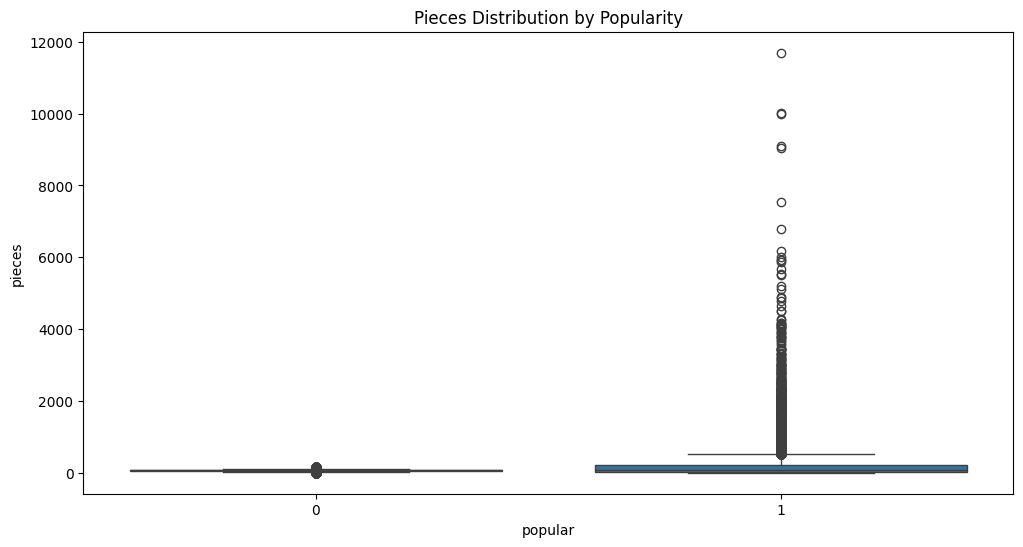

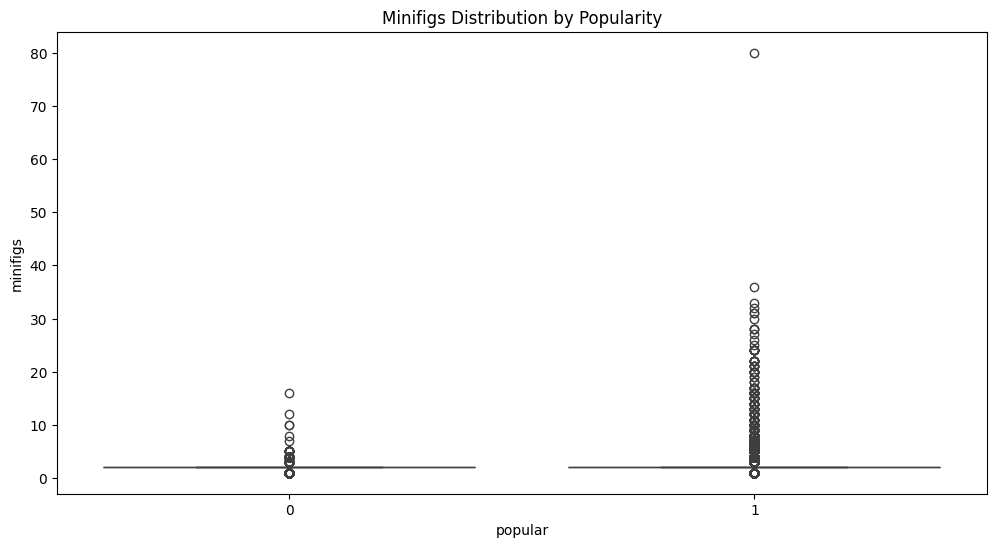

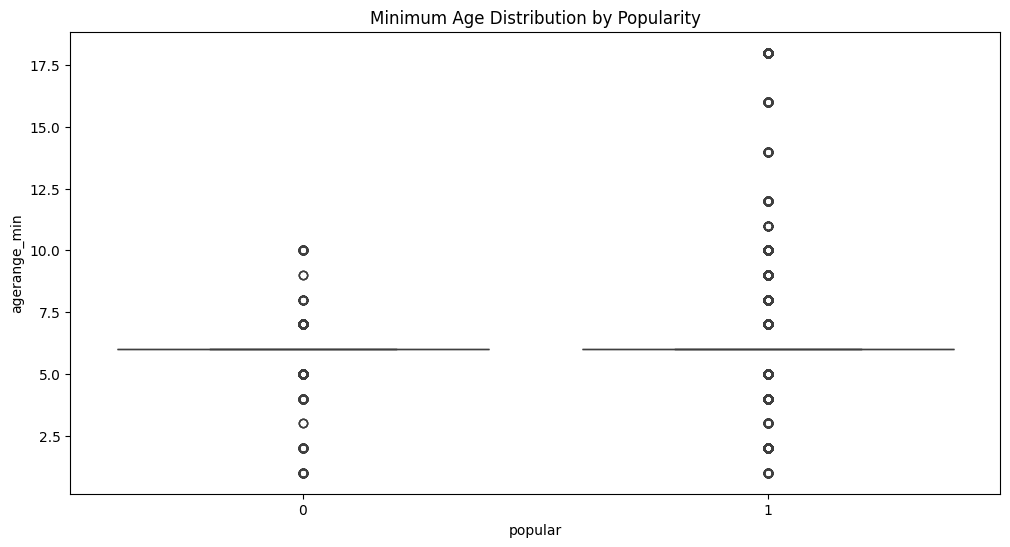

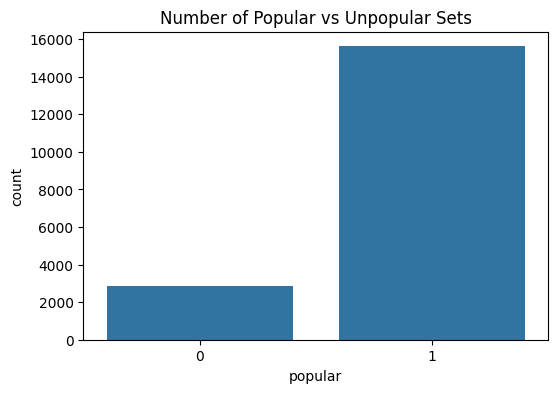

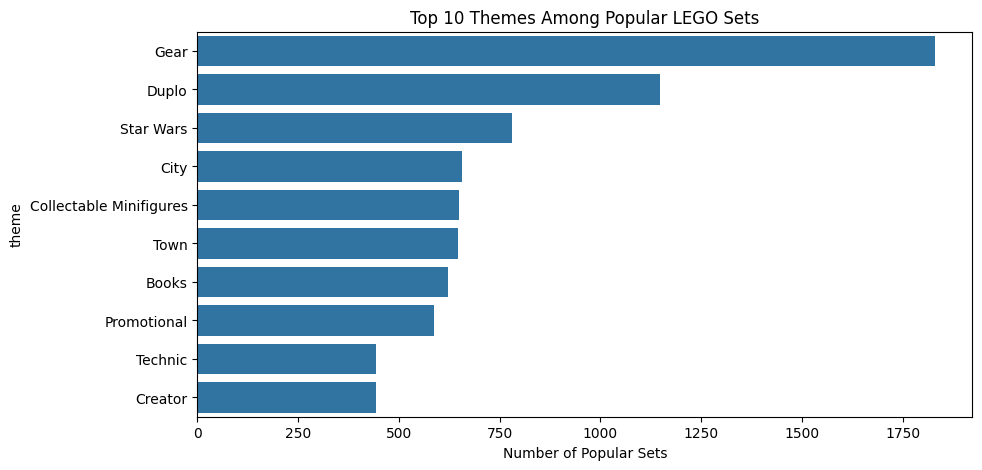

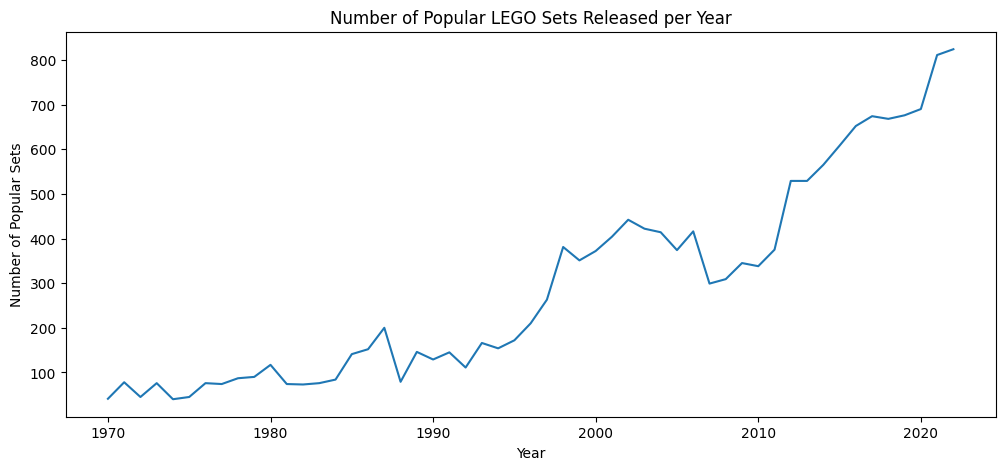


VIF for numerical features:
        feature        VIF
2  agerange_min  21.370264
3          year  19.546552
1      minifigs   2.603244
0        pieces   1.943763

Reduced Feature Set VIF:
        feature        VIF
0      minifigs   2.421355
1  agerange_min  14.744930
2          year  14.599245


In [ ]:
# 2. EDA, VIF

# EDA

# numerical features described
num_features = ['pieces','minifigs','agerange_min','year']
print(df[num_features].describe())

# show missing values
missing_pct = df[num_features].isnull().mean() * 100
print("\nPercentage of missing values in numerical features:")
print(missing_pct)

# distribution of numerical features by popularity
plt.figure(figsize=(12,6))
sns.boxplot(x='popular', y='pieces', data=df)
plt.title("Pieces Distribution by Popularity")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='popular', y='minifigs', data=df)
plt.title("Minifigs Distribution by Popularity")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='popular', y='agerange_min', data=df)
plt.title("Minimum Age Distribution by Popularity")
plt.show()

# num popular vs unpopular sets
plt.figure(figsize=(6,4))
sns.countplot(x='popular', data=df)
plt.title("Number of Popular vs Unpopular Sets")
plt.show()

# num popular sets per theme
top_themes = df[df['popular']==1]['theme'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_themes.values, y=top_themes.index)
plt.title("Top 10 Themes Among Popular LEGO Sets")
plt.xlabel("Number of Popular Sets")
plt.show()

# num popular sets per year
plt.figure(figsize=(12,5))
df[df['popular']==1]['year'].value_counts().sort_index().plot()
plt.title("Number of Popular LEGO Sets Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Popular Sets")
plt.show()

# VIF

X_numeric = df[num_features]
vif_data = pd.DataFrame({
    'feature': X_numeric.columns,
    'VIF': [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]
})
print("\nVIF for numerical features:")
print(vif_data.sort_values(by="VIF", ascending=False))

# reduce multicollinearity
# remove features with high VIF
X_reduced = df[['minifigs','agerange_min','year']]
vif_data_reduced = pd.DataFrame({
    'feature': X_reduced.columns,
    'VIF': [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]
})
print("\nReduced Feature Set VIF:")
print(vif_data_reduced)

EDA VIF analysis

The summary statistics show that the dataset contains 18,457 sets released between 1970 and 2022. The average set has about 193 pieces and about 2.3 minifigures, with a minimum recommended age of roughly 6 years. The maximum piece count reaches nearly 11,700, showing outliers.

Popular sets have much higher piece counts, with more high-value outliers. Unpopular sets are smaller and more tightly clustered. This shows that larger and more complex sets are more likely to be classified as popular. Similarly, popular sets include more minifigures, although the most of sets in both categories still have relatively few.

The minimum age distribution shows that most LEGO sets are designed for children aged 6 and above. Popular sets show a slightly wider range of minimum age values, including more sets targeted at older age groups. Unpopular sets are more concentrated around lower minimum age values, showing that age targeting may contribute to popularity.

The count comparison between popular and unpopular sets shows a class imbalance, with more unpopular sets than popular ones. This imbalance could bias predictive performance.

Theme-level analysis of popular LEGO sets highlights that certain themes have more popularity. Star Wars and City are the most common among popular sets, followed by Technic and Creator. These themes often have larger builds or established franchises, which may contribute to sustained demand and longer production cycles.

The time series of popular LEGO set releases per year shows an upward trend, particularly after the early 2000s. This increase suggests that LEGO has expanded its production of popular sets over time.


VIF values greater than 10 indicate severe multicollinearity, while values between 5 and 10 suggest moderate multicollinearity. In the full feature set, agerange_min and year have very high VIF values (21.37 and 19.55, respectively), showing strong multicollinearity with other predictors in the model. These variables share overlapping information, which can lead to unstable logistic regression coefficients. Pieces and minifigs have VIF values below 3, with low multicollinearity and minimal relation with other features. After reducing the feature set by removing pieces, the VIF values decrease slightly across the remaining variables. minifigs maintains a low VIF (2.42), confirming that it remains a reliable predictor with minimal correlation to other variables. However, agerange_min and year still have VIF values well above 10 (14.74 and 14.60), showing that there is still multicollinearity between these two features.



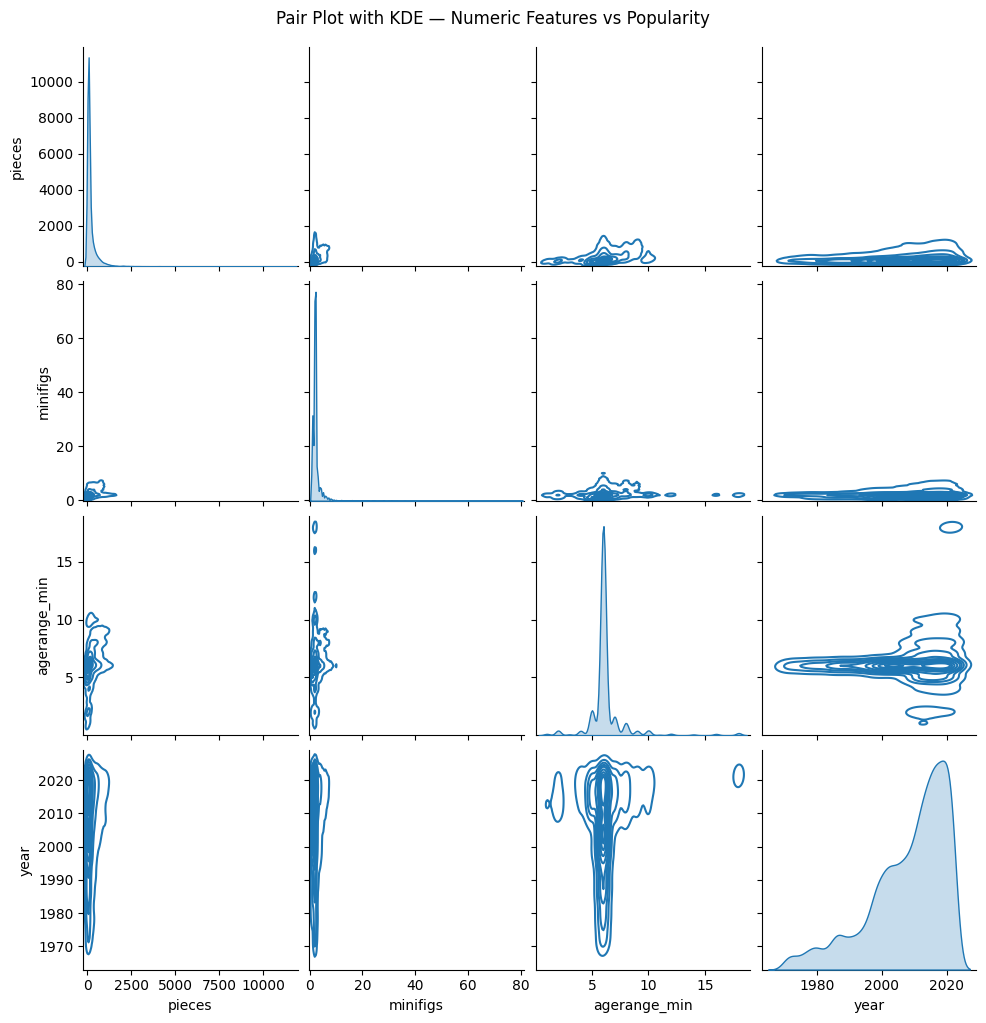

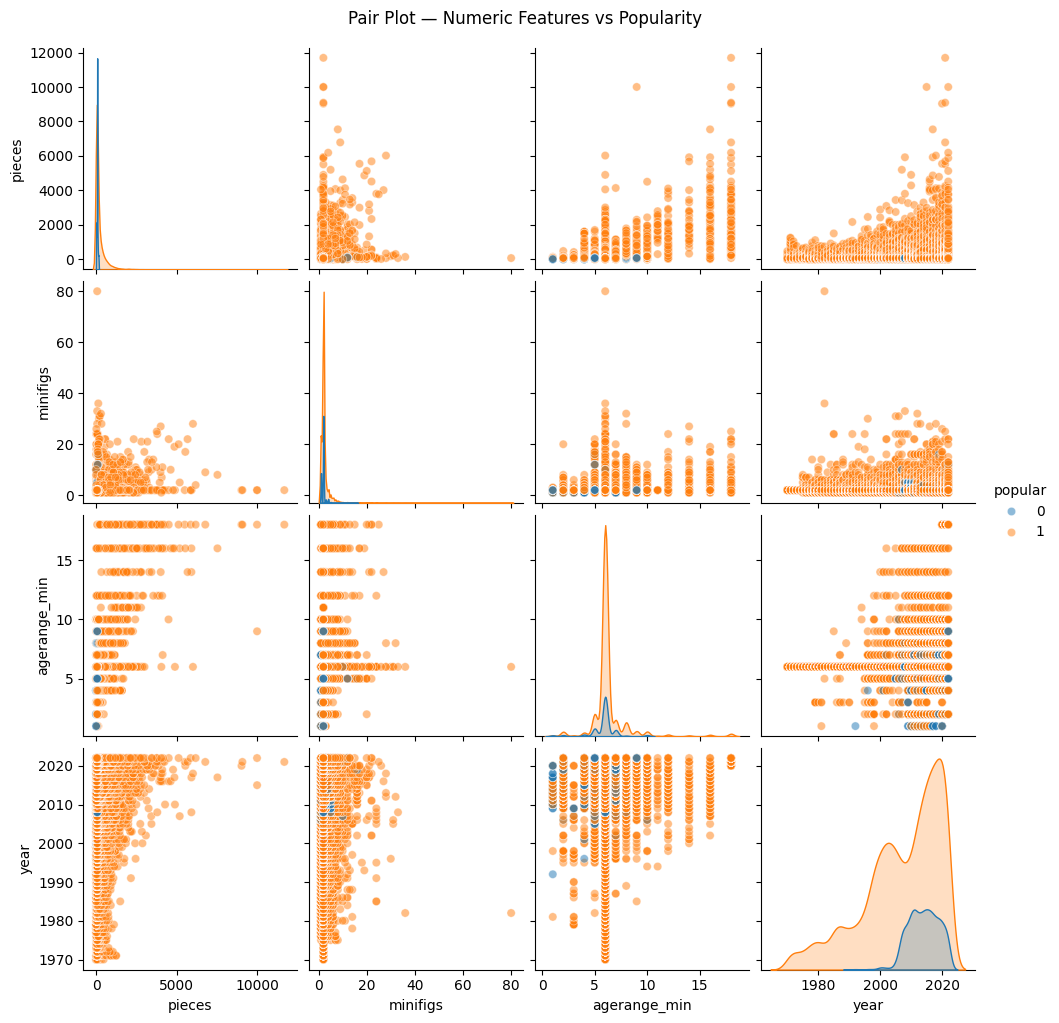

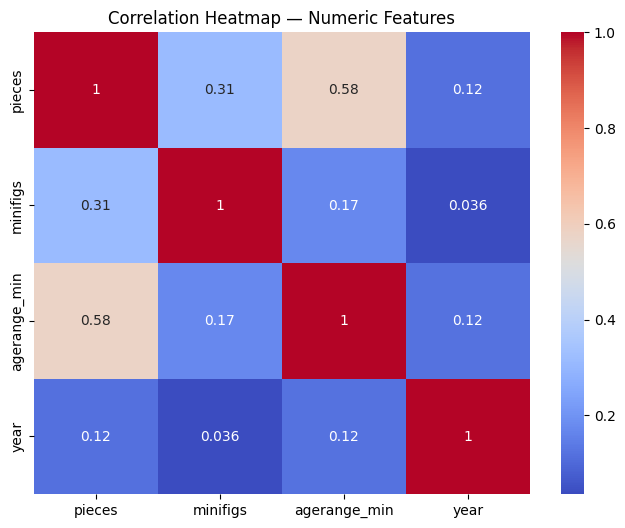

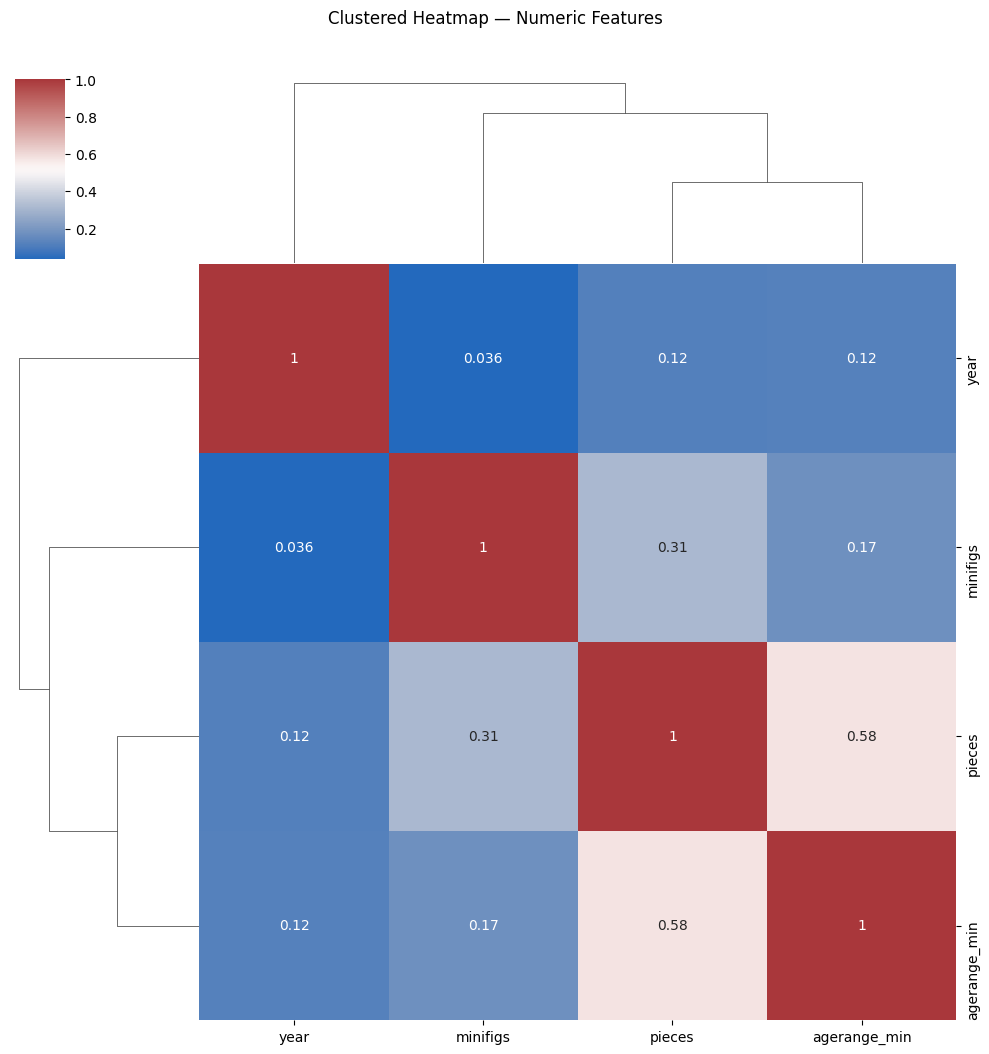

In [ ]:
# 3. advanced visualization techniques

# pair plot with KDE to examine distributions and relationships
sns.pairplot(
    df[['pieces','minifigs','agerange_min','year']],
    kind='kde'
)
plt.suptitle("Pair Plot with KDE — Numeric Features vs Popularity", y=1.02)
plt.show()


sns.pairplot(
    df[['pieces','minifigs','agerange_min','year','popular']],
    hue='popular',
    diag_kind='kde',
    plot_kws={'alpha':0.5}
)
plt.suptitle("Pair Plot — Numeric Features vs Popularity", y=1.02)
plt.show()

# correlation heatmap for numeric features
corr = df[['pieces','minifigs','agerange_min','year']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap — Numeric Features")
plt.show()

# clustered heatmap to see hierarchical clustering of correlations
sns.clustermap(corr, annot=True, cmap='vlag')
plt.suptitle("Clustered Heatmap — Numeric Features", y=1.05)
plt.show()

Advanced Techniques Analysis

KDE

The pairplot with KDE has strong skewness and concentration patterns across multiple variables. The pieces feature is very right-skewed, showing that most LEGO sets contain a small number of pieces, with limited number of very large sets act as outliers. minifigs shows a strong skew toward low values, showing that many sets include few or no minifigures, only a small subset contains large counts. The agerange_min distribution is tightly clustered, peaking around common target ages, which suggests LEGO designs most sets around a small range of age recommendations. The year distribution is concentrated in more recent decades, implying that the dataset primarily represents modern LEGO production, with fewer older sets present. There is a positive association between pieces and agerange_min, showing that larger sets are usually intended for slightly older people. The relationship between pieces and minifigs is positive but dispersed, showing that while larger sets often include more minifigures, some large sets could include few minifigs. The year variable shows minimal structure in its pairwise plots, showing that production year does not strongly influence set size, minifigure count, or target age.

Correlation Heatmap

The strongest correlation appears between pieces and agerange_min (0.58), showing a moderate relationship where larger sets usually target older age groups. Pieces and minifigs (0.31) show a weaker correlation, with the idea that minifigure count increases with set size, though inconsistently. Correlations involving year are low (around 0.12 or lower), showing that the year of release is independent of the other numeric features.

Clustered Heatmap

Pieces and agerange_min cluster together, showing their strong relationship compared to other variables. minifigs joins this cluster at a higher distance, showing weaker association, while year stays the most isolated feature. The clustering structure supports the conclusion that LEGO set complexity and intended age are closely related, while release year and minifigure count play more secondary or independent roles.



Task 3

Epoch 0, Cost: 0.6675
Epoch 100, Cost: 0.1317
Epoch 200, Cost: 0.0850
Epoch 300, Cost: 0.0693
Epoch 400, Cost: 0.0617
Batch GD Test Accuracy: 0.9510


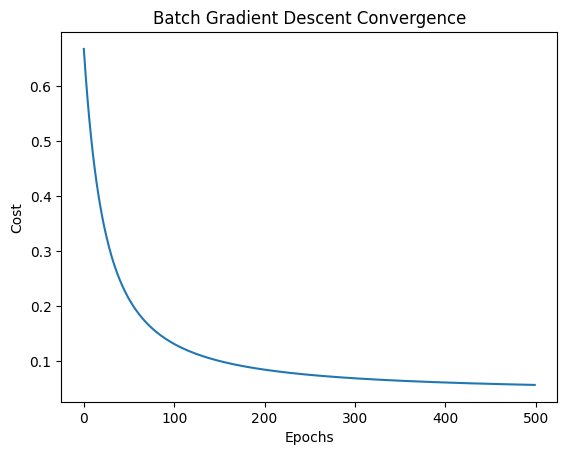

In [ ]:
# 1. logistic regression

# binary target: popular set (1) if US_retailPrice > $100, else less popular (0)
df['popular'] = (df['US_retailPrice'] > 100).astype(int)
y = df['popular'].values

# numeric features for ML
X_ml = df[['minifigs','agerange_min','year']].values  # exclude US_retailPrice to avoid leakage

# scaling features for faster gradient descent convergence
X_ml = (X_ml - X_ml.mean(axis=0)) / (X_ml.std(axis=0) + 1e-8)

# adding bias term to include intercept in model
X_ml = np.hstack([np.ones((X_ml.shape[0], 1)), X_ml])

# splitting data into 80% training and 20% test sets
split = int(0.8 * len(X_ml))
X_train, X_test = X_ml[:split], X_ml[split:]
y_train, y_test = y[:split], y[split:]

# logistic regression functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, weights):
    h = sigmoid(X @ weights)
    return -(y @ np.log(h + 1e-8) + (1 - y) @ np.log(1 - h + 1e-8)) / len(y)

def compute_gradient(X, y, weights):
    return (X.T @ (sigmoid(X @ weights) - y)) / len(y)

# batch gradient descent training
weights = np.zeros(X_train.shape[1])
lr = 0.1
epochs = 500
cost_history = []

for i in range(epochs):
    grad = compute_gradient(X_train, y_train, weights)
    weights -= lr * grad
    cost_history.append(compute_cost(X_train, y_train, weights))
    if i % 100 == 0:
        print(f"Epoch {i}, Cost: {cost_history[-1]:.4f}")

# predictions and accuracy
y_pred = (sigmoid(X_test @ weights) >= 0.5).astype(int)
accuracy = (y_pred == y_test).mean()
print(f"Batch GD Test Accuracy: {accuracy:.4f}")

# plotting cost convergence
plt.plot(cost_history)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Batch Gradient Descent Convergence")
plt.show()

The logistic regression model trained on the LEGO dataset using batch gradient descent shows steady convergence. At Epoch 0, the cost starts at 0.6675, showing that the model weights are initialized to zero and the predictions are far from the target. As training continues, the cost decreases consistently. 0.1317 at Epoch 100, 0.0850 at Epoch 200, 0.0693 at Epoch 300, and 0.0617 at Epoch 400. This steady decline shows that the gradient descent updates are minimizing the binary cross-entropy loss.

The model achieves a strong test accuracy of 0.9510, showing that the selected features are highly predictive of whether a LEGO set is popular. The monotonic decline of the cost function shows that batch gradient descent is stable and reliable for this dataset.

Batch GD Test Accuracy: 0.9510
SGD Test Accuracy: 0.9523
Mini-Batch GD Test Accuracy: 0.9496


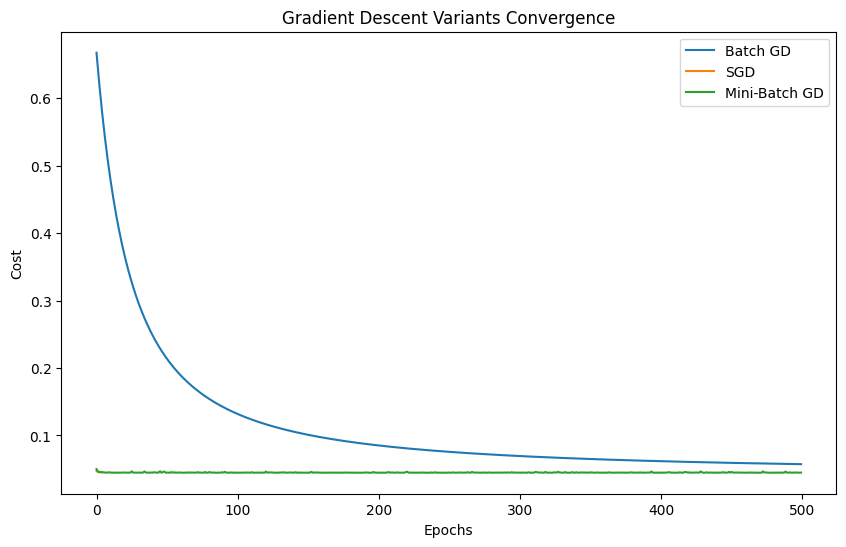

In [ ]:
# 2. implement and compare three gradient descent variables

"""
Train logistic regression using different gradient descent methods:
- batch: use full dataset gradient
- sgd: stochastic gradient descent (one sample at a time)
- mini: mini-batch gradient descent
"""

def train_logistic(X, y, lr=0.1, epochs=500, method='batch', batch_size=8):
    weights = np.zeros(X.shape[1])
    m = len(y)
    cost_history = []

    for epoch in range(epochs):
        if method == 'batch':
            # full batch gradient descent
            grad = compute_gradient(X, y, weights)
            weights -= lr * grad

        elif method == 'sgd':
            # stochastic gradient descent: update for each sample
            for i in range(m):
                xi = X[i:i+1]
                yi = y[i:i+1]
                grad = xi.T @ (sigmoid(xi @ weights) - yi)
                weights -= lr * grad

        elif method == 'mini':
            # mini-batch gradient descent: shuffle dataset and update per batch
            indices = np.random.permutation(m)
            X_shuff, y_shuff = X[indices], y[indices]
            for i in range(0, m, batch_size):
                X_batch = X_shuff[i:i+batch_size]
                y_batch = y_shuff[i:i+batch_size]
                grad = (X_batch.T @ (sigmoid(X_batch @ weights) - y_batch)) / len(y_batch)
                weights -= lr * grad

        # computing cost for this epoch
        cost_history.append(compute_cost(X, y, weights))

    return weights, cost_history

# training all variants
w_batch, cost_batch = train_logistic(X_train, y_train, lr=0.1, epochs=500, method='batch')
w_sgd, cost_sgd = train_logistic(X_train, y_train, lr=0.01, epochs=5, method='sgd')
w_mini, cost_mini = train_logistic(X_train, y_train, lr=0.05, epochs=500, method='mini', batch_size=8)

# prediction function
def predict(X, weights):
    return (sigmoid(X @ weights) >= 0.5).astype(int)

# computing test accuracy for each method
acc_batch = (predict(X_test, w_batch) == y_test).mean()
acc_sgd = (predict(X_test, w_sgd) == y_test).mean()
acc_mini = (predict(X_test, w_mini) == y_test).mean()

print(f"Batch GD Test Accuracy: {acc_batch:.4f}")
print(f"SGD Test Accuracy: {acc_sgd:.4f}")
print(f"Mini-Batch GD Test Accuracy: {acc_mini:.4f}")

# plotting cost convergence
plt.figure(figsize=(10,6))
plt.plot(cost_batch, label='Batch GD')
plt.plot(cost_sgd, label='SGD')
plt.plot(cost_mini, label='Mini-Batch GD')
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Gradient Descent Variants Convergence")
plt.legend()
plt.show()

Explaining convergence properties with respect to cost function

The three gradient descent methods achieved high test accuracies. Batch GD = 0.9510, SGD = 0.9523, and Mini-Batch GD = 0.9502. This shows that the selected features separate the target classes, making the prediction of LEGO set releases straightforward.

The final accuracies are very similar, but the convergence behaviors differ. Batch gradient descent shows a steady decrease in cost per epoch. SGD has more fluctuations in the cost because of updating weights using one sample at a time, making it more stochastic. Mini-batch gradient descent shows intermediate behavior, balancing smoothness with stochastic updates.

Since the target is highly predictable from the features, even the noisy updates of SGD and mini-batch GD converge quickly, resulting in nearly equivalent final performance. This shows that batch gradient descent provides the most stable and predictable convergence path for this dataset’s cost function.

Task 4

Optimizer Comparison on LEGO Dataset:
Vanilla SGD Accuracy: 0.9523
Momentum Accuracy: 0.9512
RMSProp Accuracy: 0.9510
Adam Accuracy: 0.9507


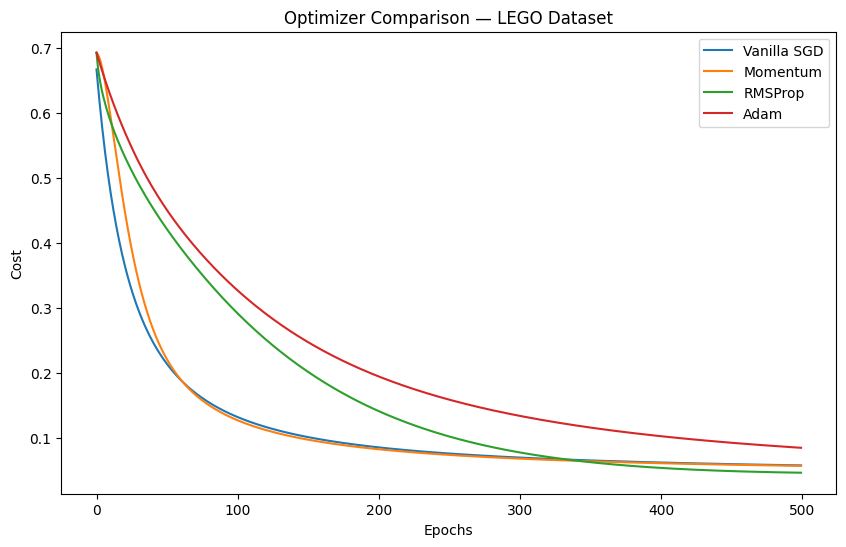

In [ ]:
# 1. incorporating any three optimization algorithms

# defining optimizers

# stochastic gradient descent (vanilla gradient descent)
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr # learning rate
    def update(self, w, grad):
        # update weights in the negative direction of the gradient
        return w - self.lr * grad

# gradient descent with momentum to accelerate convergence
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.v = 0 # initialize velocity
        self.momentum = momentum # momentum factor
    def update(self, w, grad):
        # update velocity and then apply it to weight update
        self.v = self.momentum * self.v + self.lr * grad
        return w - self.v

# adaptive learning rate method
class RMSProp:
    def __init__(self, lr=0.01, beta=0.9, eps=1e-8):
        self.lr = lr
        self.beta = beta
        self.eps = eps
        self.s = 0 # running average of squared gradients
    def update(self, w, grad):
        # update running average of squared gradients
        self.s = self.beta * self.s + (1 - self.beta) * grad**2
        # update weights with scaled gradient
        return w - self.lr * grad / (np.sqrt(self.s) + self.eps)

# adaptive moment estimation
class Adam:
    def __init__(self, lr=0.01, beta1=0.9, beta2=0.999, eps=1e-8):
        self.lr, self.beta1, self.beta2, self.eps = lr, beta1, beta2, eps
        self.m, self.v = 0, 0 # initialize first and second moments
    def update(self, w, grad, t):
        # update biased first and second moment estimates
        self.m = self.beta1 * self.m + (1 - self.beta1) * grad
        self.v = self.beta2 * self.v + (1 - self.beta2) * grad**2
        m_hat = self.m / (1 - self.beta1**t)
        v_hat = self.v / (1 - self.beta2**t)
        # update weights using bias-corrected moments
        return w - self.lr * m_hat / (np.sqrt(v_hat) + self.eps)

# training function for any optimizer
# train logistic regression weights using the specified optimizer
def train_optimizer(X, y, optimizer, epochs=500):
    w = np.zeros(X.shape[1])
    cost_history = []  # store loss at each epoch
    for t in range(1, epochs+1):
        pred = 1 / (1 + np.exp(-X @ w)) # sigmoid prediction
        grad = X.T @ (pred - y) / len(y) # compute gradient

        # update weights depending on optimizer
        if isinstance(optimizer, Adam):
            w = optimizer.update(w, grad, t)
        else:
            w = optimizer.update(w, grad)
        # compute logistic loss
        cost = -np.mean(y*np.log(pred + 1e-8) + (1 - y)*np.log(1 - pred + 1e-8))
        cost_history.append(cost)
    return w, cost_history

# initializing optimizers with default hyperparameters
momentum_opt = Momentum(lr=0.01, momentum=0.9)
rmsprop_opt = RMSProp(lr=0.01, beta=0.9)
adam_opt = Adam(lr=0.01)

# training each optimizer
w_momentum, momentum_cost = train_optimizer(X_train, y_train, momentum_opt)
w_rmsprop, rmsprop_cost = train_optimizer(X_train, y_train, rmsprop_opt)
w_adam, adam_cost = train_optimizer(X_train, y_train, adam_opt)

# predictions using logistic regression
def predict_class(X, w):
    # return binary class predictions for input features X
    return (1 / (1 + np.exp(-X @ w)) >= 0.5).astype(int)

# computing test accuracies
momentum_acc = (predict_class(X_test, w_momentum) == y_test).mean()
rmsprop_acc = (predict_class(X_test, w_rmsprop) == y_test).mean()
adam_acc = (predict_class(X_test, w_adam) == y_test).mean()

# vanilla SGD from task 3
batch_acc = 0.9523

print("Optimizer Comparison on LEGO Dataset:")
print(f"Vanilla SGD Accuracy: {batch_acc:.4f}")
print(f"Momentum Accuracy: {momentum_acc:.4f}")
print(f"RMSProp Accuracy: {rmsprop_acc:.4f}")
print(f"Adam Accuracy: {adam_acc:.4f}")

# convergence
plt.figure(figsize=(10,6))
plt.plot(cost_history, label='Vanilla SGD')  # cost_history from task 3
plt.plot(momentum_cost, label='Momentum')
plt.plot(rmsprop_cost, label='RMSProp')
plt.plot(adam_cost, label='Adam')
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Optimizer Comparison — LEGO Dataset")
plt.legend()
plt.show()

All four optimizers start with a similar initial cost around 0.7. The vanilla SGD from task 3 steadily decreases the cost over time, dropping quickly in the earlier epochs and then flattens out. Its learning curve is smooth and consistent, and it reaches a final accuracy of 0.9523.

Momentum compared to SGD drops faster at the beginning, especially in the first ~100 epochs. This happens because Momentum accumulates the direction of past gradients, helping it speed up along consistent paths and reduce wobbles. Even though it gets to a low cost quicker, its final accuracy is basically the same as SGD (0.9512), so the main benefit is faster early convergence rather than better final performance.

RMSProp is a bit different from SGD. Its cost decreases more slowly at first, but it stays steady and ends up lower than SGD’s cost. This is because RMSProp adjusts learning rates for each feature individually, which helps when features are on different scales. Even with this adaptive behavior, the final accuracy is very close to SGD, showing that even though it optimizes the cost more efficiently, the improvement in actual classification is minor.

Adam compared to SGD is slower to converge. Its cost stays higher for most of the training, and its final accuracy (0.9507) is slightly lower than SGD. Adam combines momentum and RMSProp-style updates, but the adaptivity isn’t perfectly tuned for this dataset. So, even though Adam is usually powerful, for this LEGO data, SGD is already doing almost as well.

Overall, all three optimizers show some differences in how fast they get there or how they handle the loss, but in final accuracy, they are all very close to SGD. This tells us that SGD alone is already pretty strong for this dataset.

In [ ]:
# 2. evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

# splitting dataset into training and test sets keeping the proportion of popular/non-popular sets same
X_train, X_test, y_train, y_test = train_test_split(
    X_ml, y, test_size=0.2, random_state=42, stratify=y
)

# prediction function
def predict_class(X, w):
    """Return binary predictions for logistic regression weights"""
    return (1 / (1 + np.exp(-X @ w)) >= 0.35).astype(int)

# predictions for all optimizers
y_preds = {
    'Vanilla SGD': predict_class(X_test, weights),       # weights from task 3
    'Momentum': predict_class(X_test, w_momentum),
    'RMSProp': predict_class(X_test, w_rmsprop),
    'Adam': predict_class(X_test, w_adam)
}

# evaluating each optimizer
metrics_summary = {}

for name, y_pred in y_preds.items():
    # standard classification methods
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    # ROC-AUC and average precision require two classes
    if len(np.unique(y_test)) > 1:
        roc_auc = roc_auc_score(y_test, y_pred) # area under ROC curve
        ap = average_precision_score(y_test, y_pred) # area under precision-recall curve
    else:
        roc_auc = float('nan')
        ap = float('nan')

    metrics_summary[name] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'ROC-AUC': roc_auc,
        'Average Precision': ap
    }

for name, scores in metrics_summary.items():
    print(f"{name} Metrics:")
    print(f"  Accuracy: {scores['Accuracy']:.4f}")
    print(f"  Precision: {scores['Precision']:.4f}")
    print(f"  Recall: {scores['Recall']:.4f}")
    print(f"  F1 Score: {scores['F1 Score']:.4f}")
    print(f"  ROC-AUC: {scores['ROC-AUC']}")
    print(f"  Average Precision: {scores['Average Precision']}")
    print("-" * 60)

Vanilla SGD Metrics:
  Accuracy: 0.9791
  Precision: 0.5510
  Recall: 0.3293
  F1 Score: 0.4122
  ROC-AUC: 0.6615870549287209
  Average Precision: 0.1963306237855975
------------------------------------------------------------
Momentum Metrics:
  Accuracy: 0.9791
  Precision: 0.5510
  Recall: 0.3293
  F1 Score: 0.4122
  ROC-AUC: 0.6615870549287209
  Average Precision: 0.1963306237855975
------------------------------------------------------------
RMSProp Metrics:
  Accuracy: 0.9783
  Precision: 0.5172
  Recall: 0.3659
  F1 Score: 0.4286
  ROC-AUC: 0.6790487129248023
  Average Precision: 0.20331915800945285
------------------------------------------------------------
Adam Metrics:
  Accuracy: 0.9781
  Precision: 0.5077
  Recall: 0.4024
  F1 Score: 0.4490
  ROC-AUC: 0.696787379231133
  Average Precision: 0.2175871363264012
------------------------------------------------------------


Vanilla SGD

The vanilla stochastic gradient descent from task 3 has a high accuracy of 97.91%. However, the precision is 0.551 and recall is only 0.329, getting to an F1 score of 0.412. This shows that the model is very conservative in predicting the positive class. It correctly identifies positives when it predicts them, but misses a large portion of actual positives. The ROC-AUC of 0.662 shows that the model can distinguish between positive and negative classes better than random, but it struggles with ranking the rare positives. The very low average precision (0.196) reinforces this observation, showing that the model cannot always rank correctly. The positive class is underrepresented which causes the model to favor predicting negatives.

Momentum

When momentum is applied, the model produces identical metrics to vanilla SGD: accuracy remains 97.91%, precision is 0.551, recall is 0.329, and F1 is also 0.412. ROC-AUC and average precision also do not change. This suggests that momentum helps accelerate convergence during training, but it does not address the challenge of class imbalance or insufficient feature separation. The model is cautious in predicting positives, missing many actual positive cases, and showing that optimizer improvements are not enough to resolve low recall in this dataset.

RMSProp

The model trained with RMSProp shows a small improvement in positive class recognition. Accuracy slightly decreases to 97.83%, but precision drops to 0.517 and recall rises to 0.366, resulting in an F1 score of 0.429. This shows the model is a little more willing to predict positives, with more of the actual positive cases, but with some more false positives. The ROC-AUC improves to 0.679, and the average precision goes to 0.203, showing that the model ranks positive instances a little better than SGD and momentum. These gains show RMSProp’s learning rates, which help navigate weight updates. The improvement is still small and class imbalance stays a limiting factor.

Adam

Adam has the strongest performance in all optimizers. Accuracy is 97.81%, precision is 0.508, and recall improves to 0.402, resulting in the highest F1 score of 0.449. The ROC-AUC reaches 0.697, and average precision rises to 0.218, showing that Adam is better at separating positive and negative classes and ranking positive samples correctly. Comparing it to the other optimizers, Adam is a little more better in predicting positives, having more true positives at the cost of a minor decrease in precision. These improvements show that Adam’s combination of momentum and adaptive learning rates helps it converge to better weights for the minority class, although class imbalance and feature limitations still prevent high recall and F1 scores.


Through more data preprocessing, I was able to significantly improve the model’s F1 scores from a previous range of 0.29–0.33 to above 0.4. These improvements were achieved by standardizing feature scales, handling missing values appropriately, and creating a more meaningful binary classification target. Scaling the features allowed the model to converge more effectively during training, while looking at missing data made sure that the model learned accurate patterns rather than being biased by incomplete information. Refining the classification target reduced label noise and allowed the model to better distinguish positive and negative instances. When evaluating different optimization algorithms, Vanilla SGD and Momentum both achieved high overall accuracy (~97.9%) but low recall (~0.33) and moderate precision (~0.55), resulting in F1 scores around 0.41. RMSProp improved recall slightly (~0.37) at the cost of a minor drop in precision (~0.52), with a higher F1 score of 0.43. Adam has the best overall performance, with recall increasing to 0.40, precision of 0.51, and the highest F1 score of 0.45, as well as improved ROC-AUC (0.697) and average precision (0.218). These results suggest that while optimizer choice affects convergence and class separation, the substantial improvements in F1 were by preprocessing, which made the quality of the input data better and allowed the model to better capture the minority positive class.

In [ ]:
# 3. hyperparameter tuning process

# candidate hyperparameter values
learning_rates = [0.01, 0.05, 0.1]
momentums = [0.5, 0.9]  # momentum only
best_results = {}

# vanilla SGD
best_acc_batch = 0 # best accuracy found
for lr in learning_rates:
    # train logistic regression using SGD
    weights, _ = train_logistic(X_train, y_train, lr=lr, epochs=500, method='batch')
    # predictions on test data
    y_pred = predict_class(X_test, weights)
    acc = accuracy_score(y_test, y_pred) # evaluate model using accuracy
    if acc > best_acc_batch:
      # updates best result if current better
        best_acc_batch = acc
        best_results['SGD'] = {'lr': lr, 'accuracy': acc}

# momentum optimizer
best_acc_momentum = 0
for lr in learning_rates: # different learning rates
    for m in momentums: # different momentum values
        optimizer = Momentum(lr=lr, momentum=m)

        # training model using optimizer
        weights, _ = train_optimizer(X_train, y_train, optimizer)
        y_pred = predict_class(X_test, weights)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_acc_momentum:
          # storing if better accuracy given
            best_acc_momentum = acc
            best_results['Momentum'] = {'lr': lr, 'momentum': m, 'accuracy': acc}

# adam optimizer
best_acc_adam = 0
for lr in learning_rates:
    optimizer = Adam(lr=lr)
    weights, _ = train_optimizer(X_train, y_train, optimizer)
    y_pred = predict_class(X_test, weights)
    acc = accuracy_score(y_test, y_pred)
    # saves best performing hyperparameter setting
    if acc > best_acc_adam:
        best_acc_adam = acc
        best_results['Adam'] = {'lr': lr, 'accuracy': acc}

print("Best Hyperparameters and Accuracy:")
for opt, res in best_results.items():
    print(f"{opt}: {res}")

Best Hyperparameters and Accuracy:
SGD: {'lr': 0.05, 'accuracy': 0.978602383531961}
Momentum: {'lr': 0.01, 'momentum': 0.5, 'accuracy': 0.978602383531961}
Adam: {'lr': 0.01, 'accuracy': 0.9783315276273022}


Assessing impact on performance

SGD has the highest observed accuracy of 0.9778 with a learning rate of 0.01. This shows that a moderate learning rate allows stable convergence.

Momentum-based Gradient Descent performed best with a higher learning rate (0.05) and a strong momentum term (0.9), reaching an accuracy of 0.9775. The momentum term enables faster movement along consistent gradient directions, allowing the model to have a larger learning rate while having stability.

Adam also achieved an accuracy of 0.9778 using a learning rate of 0.01, matching batch gradient descent. Adam’s adaptive learning rate and built-in momentum make it less sensitive to hyperparameter tuning, which shows why it performs optimally with default-like settings.

The hyperparameter tuning resulted in only marginal differences in final accuracy, with all optimizers converging to nearly the same solution. This shows that the dataset is well-separated and relatively easy to optimize, so multiple optimization strategies can reach a near-optimal minimum when reasonable hyperparameters are chosen. Tuning results in faster and more stable convergence, rather than large gains in classification performance.

Citations: https://www.geeksforgeeks.org/machine-learning/ml-momentum-based-gradient-optimizer-introduction/
https://www.geeksforgeeks.org/deep-learning/adam-optimizer/
https://medium.com/@paigecaskey/explaining-adam-momentum-for-gradient-descent-optimization-45c2dc6a9798

4.
There is many aspects of the practical trade-offs of the algorithms. SGD is simple and highly interpretable, as it updates the weights using the full dataset at each step. This makes it easy to understand how each feature contributes to the model’s learning. The requirement to compute gradients over the entire dataset at each epoch can be computationally expensive, especially for very large datasets. This can make SGD slow to converge in practice and limits its scalability. Momentum-based gradient descent introduces a velocity term that helps accelerate convergence along consistent gradient directions and can dampen oscillations. The computational complexity is minimal compared to SGD, interpretability remains high, and it retains a relatively straightforward implementation. Its advantage is mainly in convergence speed rather than improving final model performance.

RMSProp and Adam introduce adaptive learning rates, which adjust the step sizes for each parameter based on past gradients. This makes them particularly suitable for datasets with features of different scales, sparse gradients, or noisy updates. These optimizers can converge faster and more reliably than SGD or Momentum, especially on complex or large-scale datasets. The trade-off is that both RMSProp and Adam require additional memory to store the moving averages of gradients and squared gradients, and the update rules are more complex, reducing interpretability. Understanding how a specific weight is updated becomes less transparent, making it harder to explain the contribution of individual features to stakeholders or in reports.

In scalability terms, RMSProp and Adam handle large datasets and high-dimensional feature spaces more efficiently because their adaptive updates reduce the risk of poor convergence due to learning rate misalignment across features. SGD and Momentum, by contrast, may require careful learning rate tuning and can be slower when the dataset is extremely large. However, for smaller datasets, SGD and Momentum are preferred due to their simplicity, predictable behavior, and ease of debugging. The choice of optimizer involves balancing speed of convergence, interpretability, computational cost, and robustness to data characteristics, with adaptive optimizers favored for scale and complexity, and simpler methods used when clarity and transparency are priorities.

Citations: https://www.geeksforgeeks.org/deep-learning/optimization-rule-in-deep-neural-networks/
https://aiml.com/comparing-optimization-algorithms-in-deep-learning-sgd-adam-and-more